# House Price Prediction using Neural Network
Author: Kim Hazed Delfino

## Imports 

In [852]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load Data

In [853]:
path = r"C:\Users\kdelfino\Documents\GitHub\Neural_network\train.csv"

In [854]:
df = pd.read_csv(path)

## Exploratory Data Analysis

In [855]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [856]:
# Check for duplicates
df.duplicated().sum()

0

In [857]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [858]:
# print 70% of our dataset as threshold for dropping cols
print(f'if the column is missing {round(1460*.7)} we can drop the entire column')

if the column is missing 1022 we can drop the entire column


In [859]:
# Drop Cols that have missing values > 1022
df.drop(columns=['PoolQC','Fence', 'MiscFeature','Alley'],inplace=True)

In [860]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

- Looks like we still have `FireplaceQu` column that only has 770 out of 1460 rows
- Let's check if the values remaining has value in our dataset enough to justtify keeping or dropping

In [861]:
# Check for FireplaceQu data distribution
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [862]:
print(f"FireplaceQu only has {round(770/1460*100)}% of its data remaining")

FireplaceQu only has 53% of its data remaining


- dropping the `FireplaceQu` as well due to the amount of missing data and the reamining data relative to our target is not that important 

In [863]:
df.drop(columns='FireplaceQu', inplace=True)

In [864]:
# Check missing values of missing cols
df.isna().sum().value_counts()

0      62
81      5
37      3
8       2
38      2
259     1
1       1
dtype: int64

- looks like our highest missing value is from `LotFrontage` with `259 missing values` but according to Data_description LotFrontage is measurement of length of the street relative to the front of the lot whereas LotArea is a measurement of length and width of the lot so we can just drop LotFrontage entirely 

In [865]:
# Drop LotFrontage and ID
df.drop(columns=['LotFrontage','Id'], inplace=True)

In [866]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

## Distribution using Histogram

In [867]:
# Create num selector 
num_filter = df.select_dtypes(include='number')

# Create object selector 
obj_filter = df.select_dtypes(include='object')

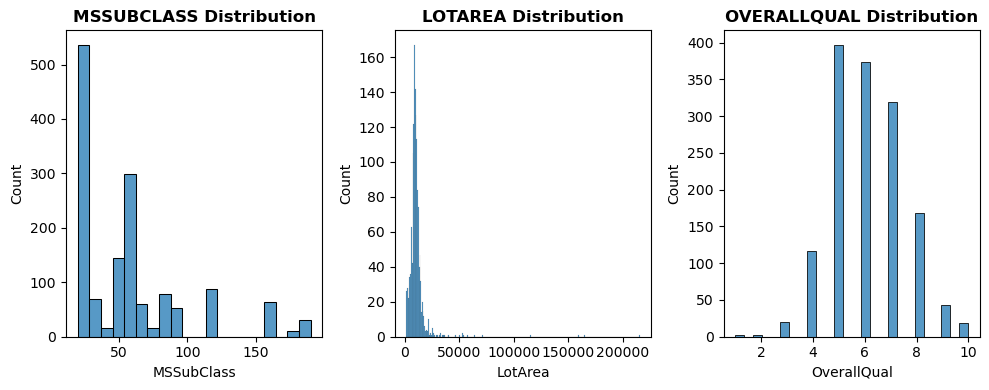

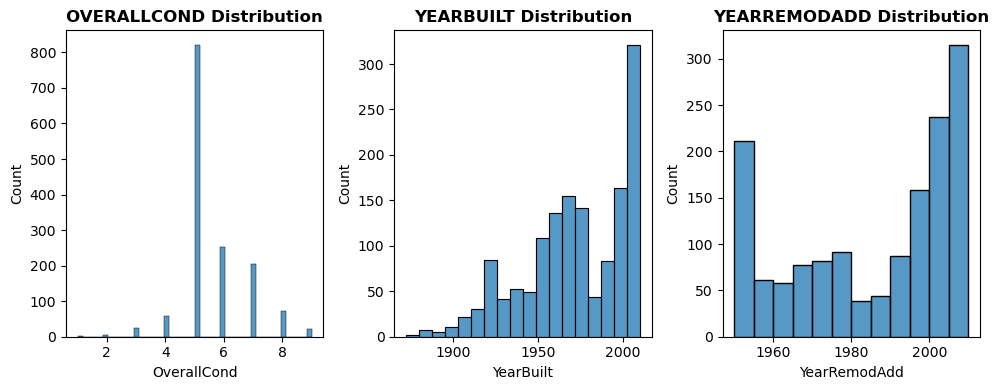

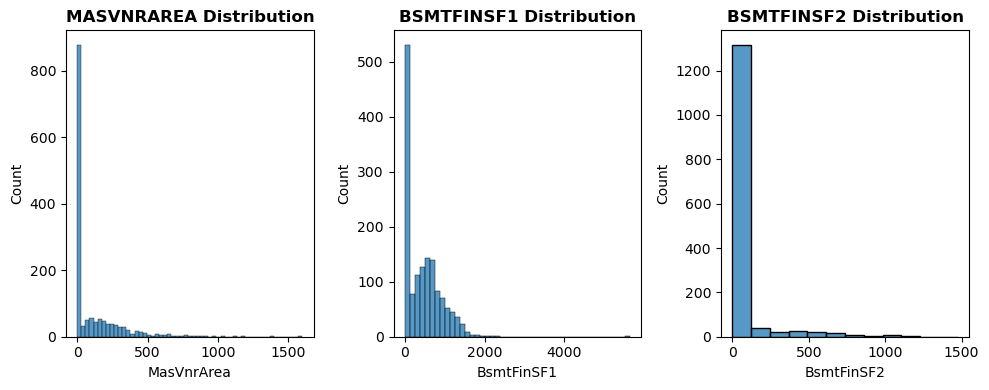

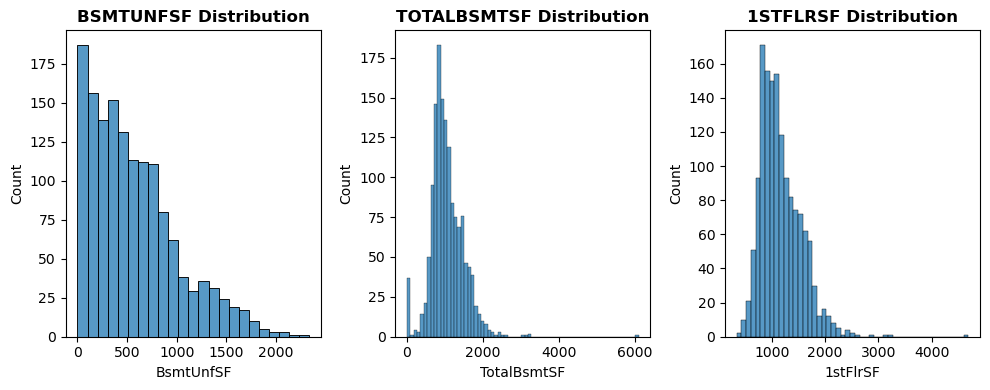

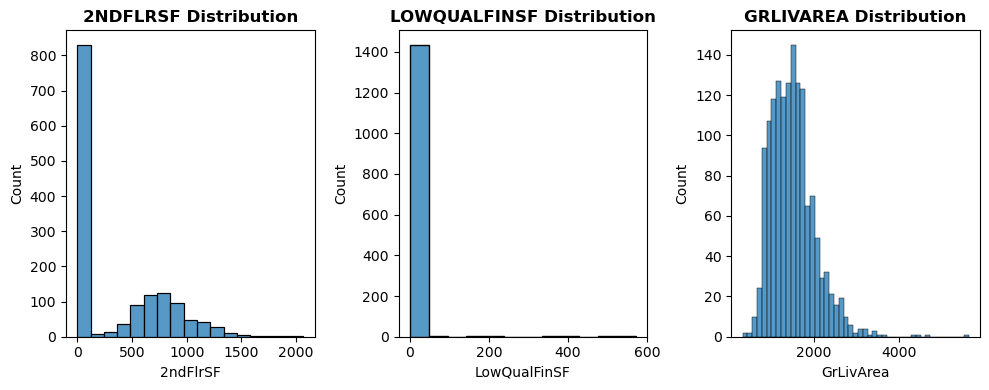

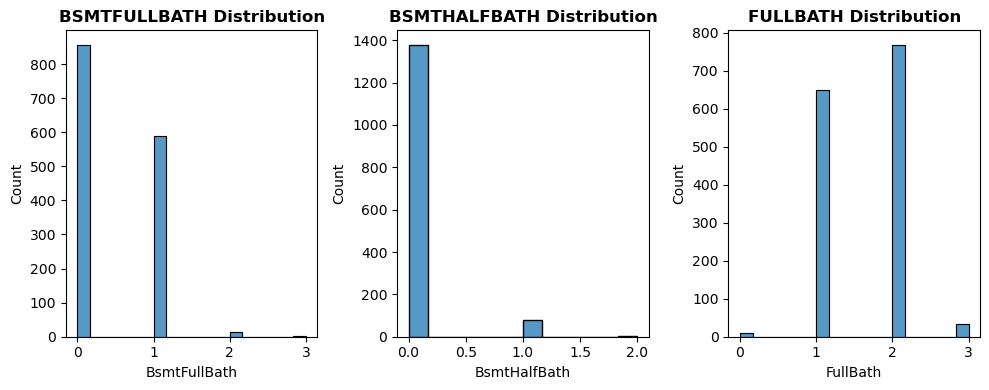

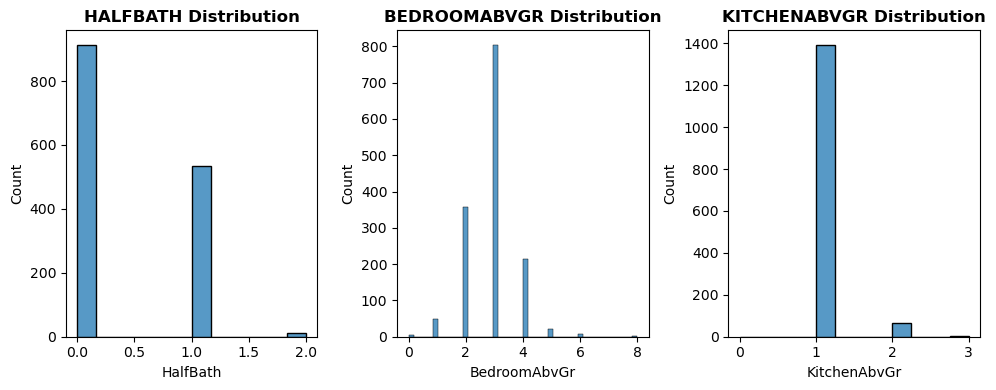

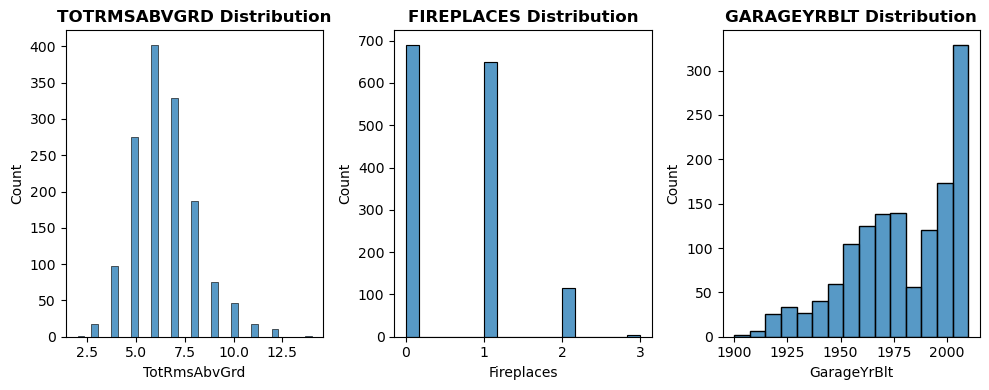

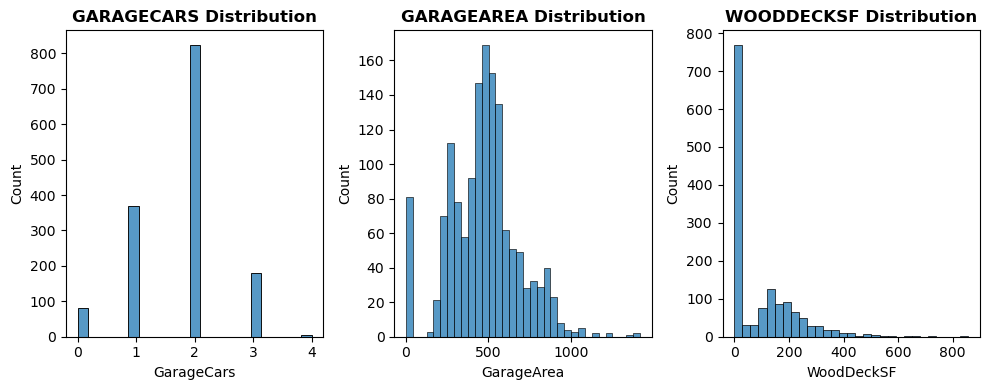

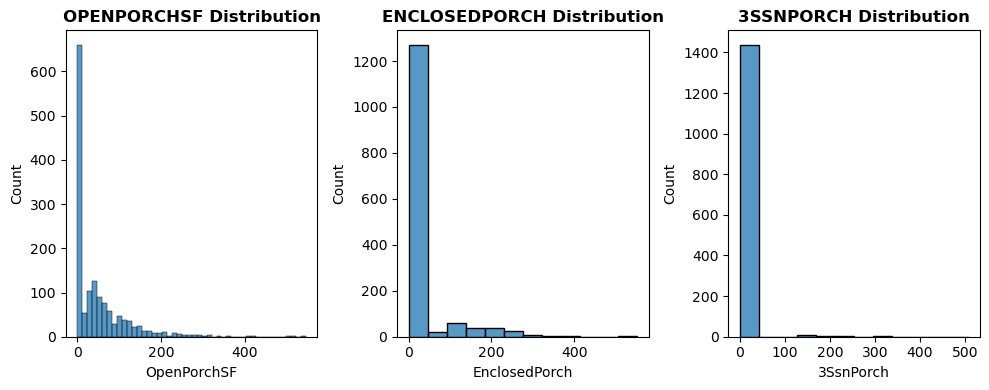

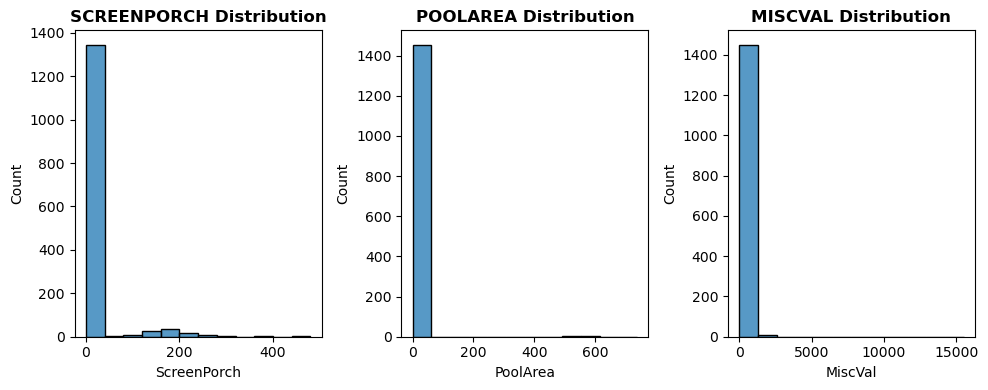

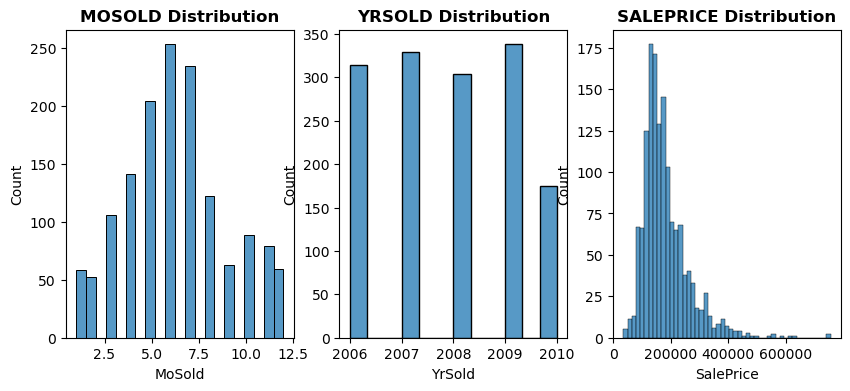

In [868]:
# Distribution for Num columns
col_ax = 0
row_limit = 11
counter = 0
fig, axes = plt.subplots(ncols=3, figsize=(10,4))
# Iterate to all features and display Historgram
for col in num_filter.columns:
    # Set Historgram 
    ax=sns.histplot(data=num_filter, x=col, ax=axes[col_ax])
    axes[col_ax].set_title(col.upper()+" Distribution", fontweight="bold")
    
    # Display every 2 cols and set new fig
    if col_ax == 2 and counter != row_limit:
        fig.tight_layout()
        fig, axes = plt.subplots(ncols=3, figsize=(10,4))
        col_ax = 0
        counter += 1
    else:
        col_ax += 1

- BsmtFinSF2, LowQualFinSF, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal will be dropped due to really skewed Distribution which provide little to know help with our Model learning rate/ training

In [869]:
# Drop Skewed Distribution from our dataset
df.drop(columns=['BsmtFinSF2', 'LowQualFinSF',
                 'BsmtHalfBath', 'KitchenAbvGr',
                 'EnclosedPorch', '3SsnPorch',
                 'ScreenPorch', 'PoolArea',
                 'MiscVal'], inplace=True)

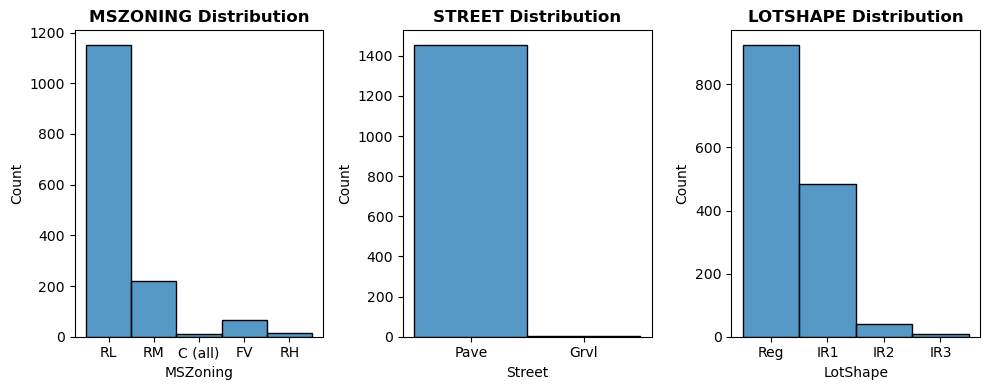

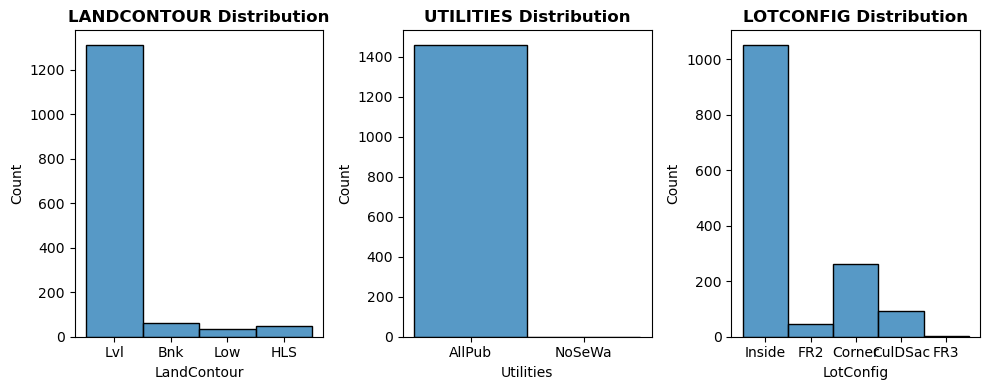

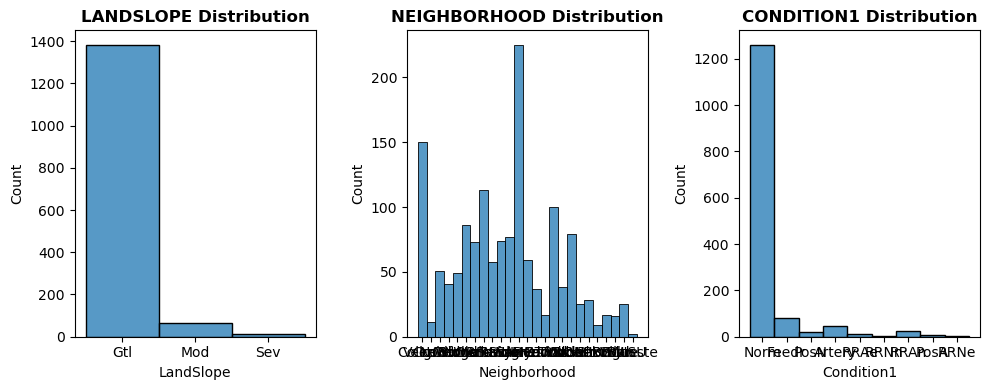

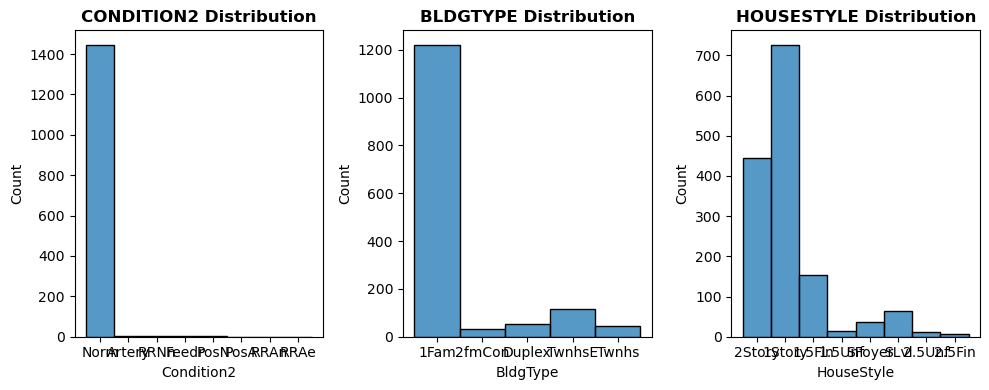

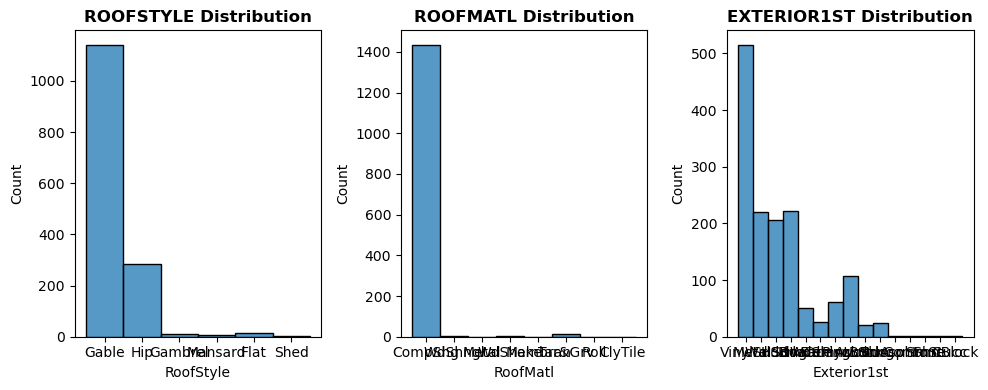

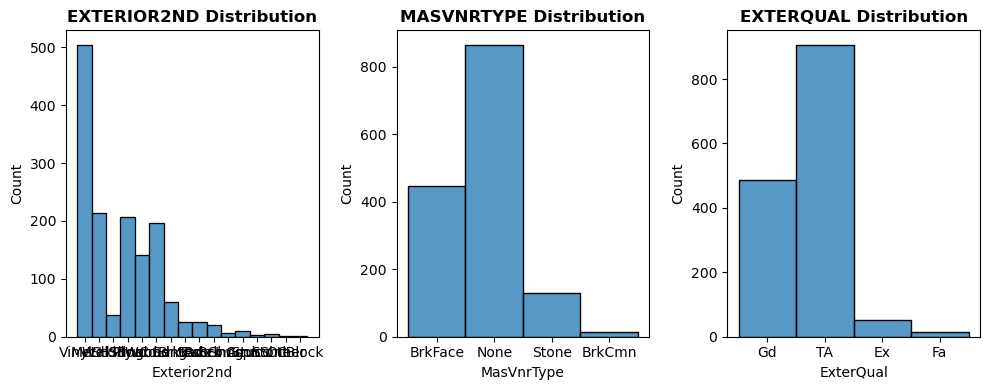

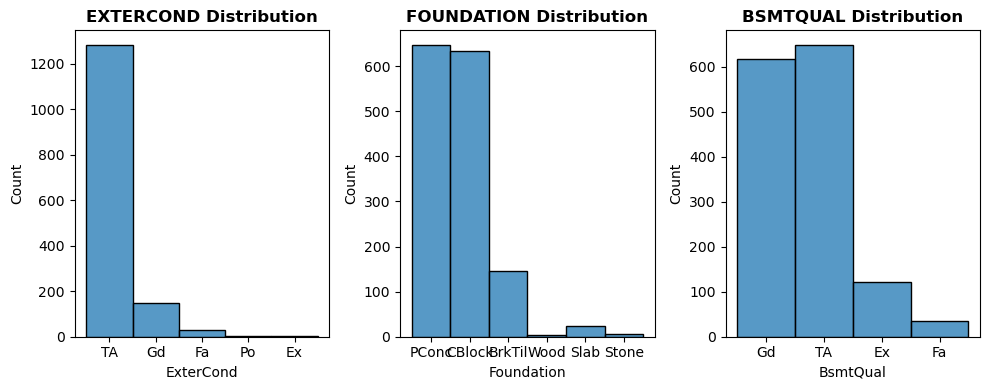

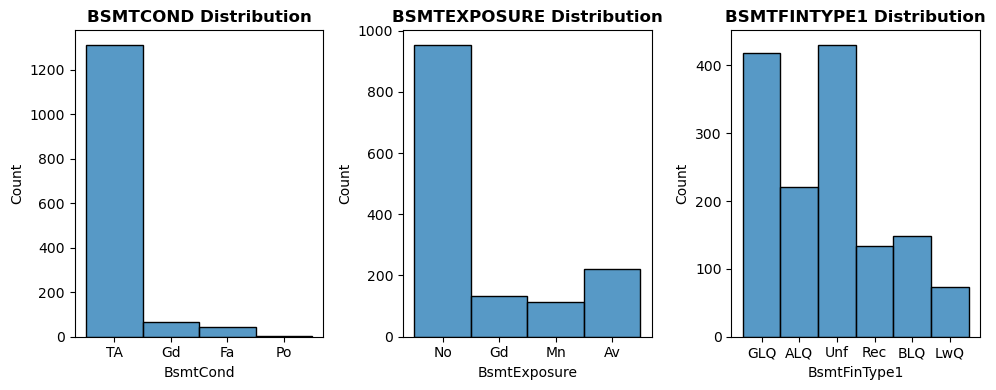

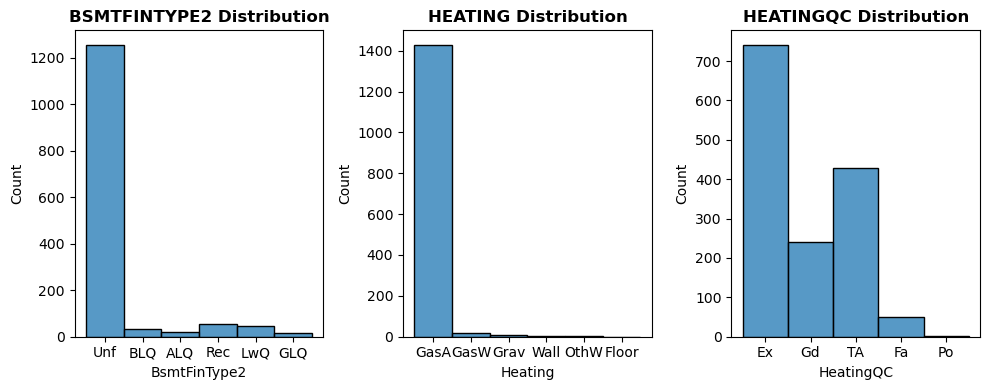

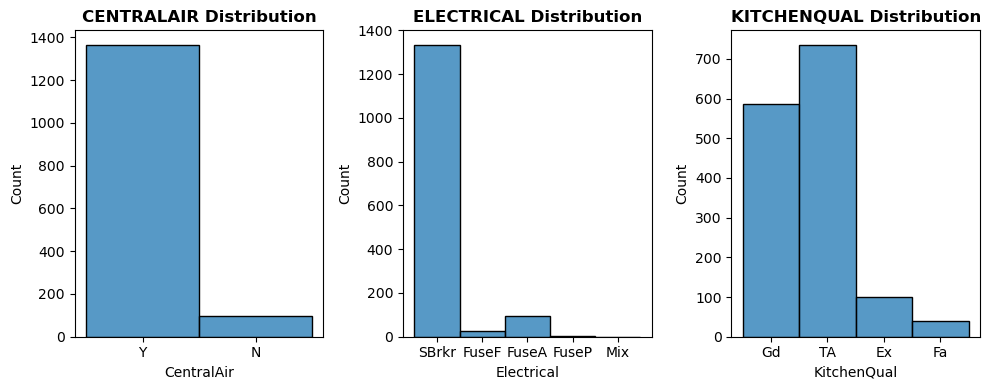

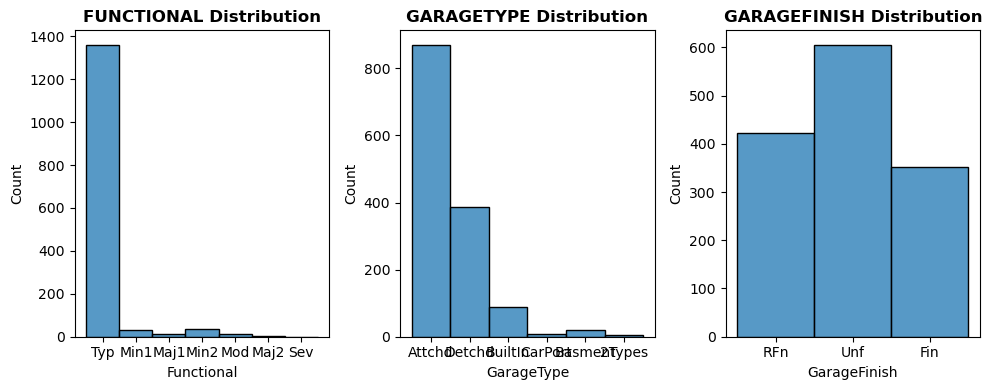

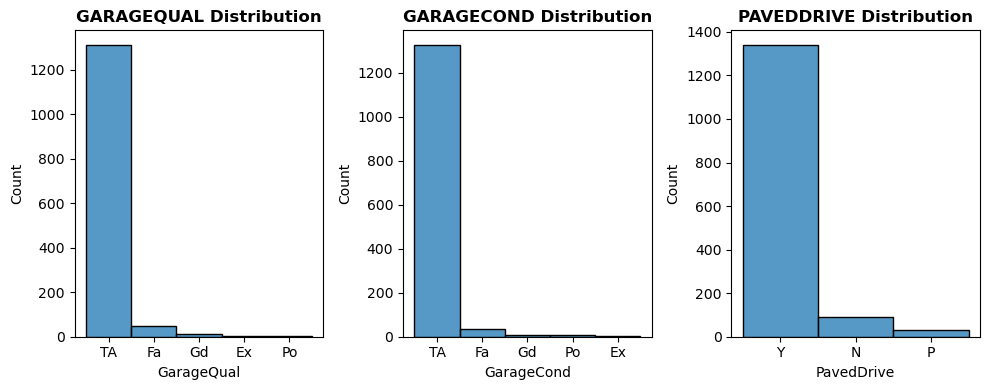

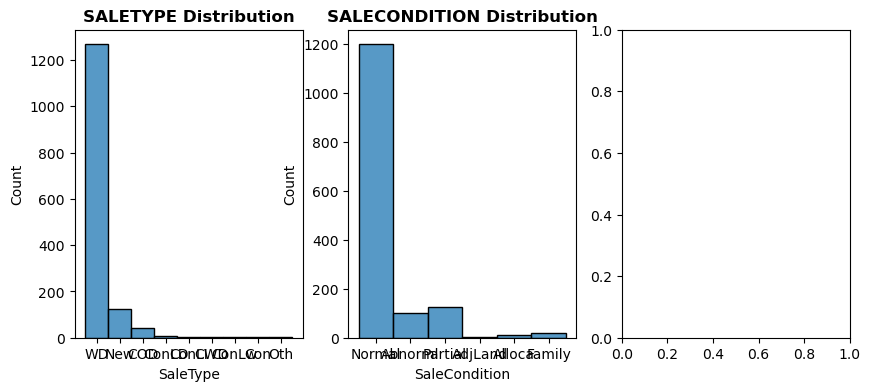

In [870]:
# Distribution for object columns
col_ax = 0
row_limit = 13
counter = 0
fig, axes = plt.subplots(ncols=3, figsize=(10,4))
# Iterate to all features and display Historgram
for col in obj_filter.columns:
    # Set Historgram 
    ax=sns.histplot(data=obj_filter, x=col, ax=axes[col_ax])
    axes[col_ax].set_title(col.upper()+" Distribution", fontweight="bold")
    
    # Display every 2 cols and set new fig
    if col_ax == 2 and counter != row_limit:
        fig.tight_layout()
        fig, axes = plt.subplots(ncols=3, figsize=(10,4))
        col_ax = 0
        counter += 1
    else:
        col_ax += 1

- "Street", "LandContour", "Utilities", "LandSlope", "Condition1", "Condition2", "RoofMatl", "BsmtCond", "BsmtFinType2", "Heating", "Electrical", "CentralAir", "Electrical", "Functional", "GarageQual", "GarageCond", "PavedDrive", "SaleType", "SaleCondition" will be dropped due to skewed Distribution and providing no value to our model training 

In [871]:
# Drop obj cols mentioned above
df.drop(columns=["Street", "LandContour",
                "Utilities", "LandSlope",
                "Condition1", "Condition2",
                "RoofMatl", "BsmtCond",
                "BsmtFinType2", "Heating",
                "Electrical", "CentralAir",
                "Electrical", "Functional",
                "GarageQual", "GarageCond",
                "PavedDrive", "SaleType",
                "SaleCondition"], inplace=True)

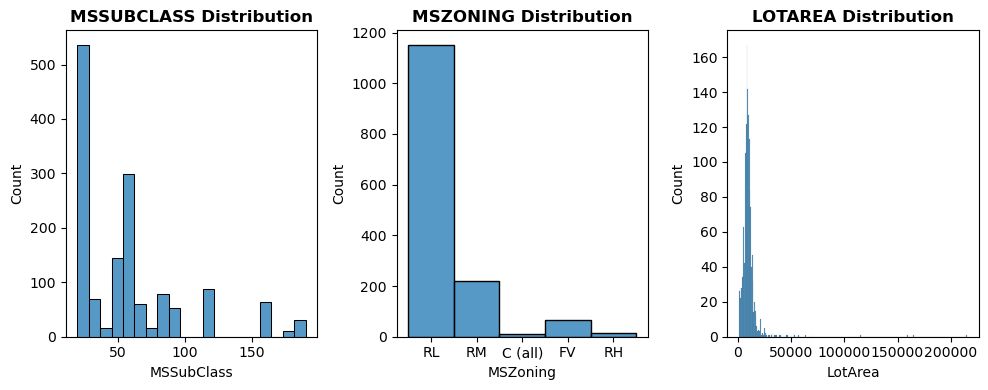

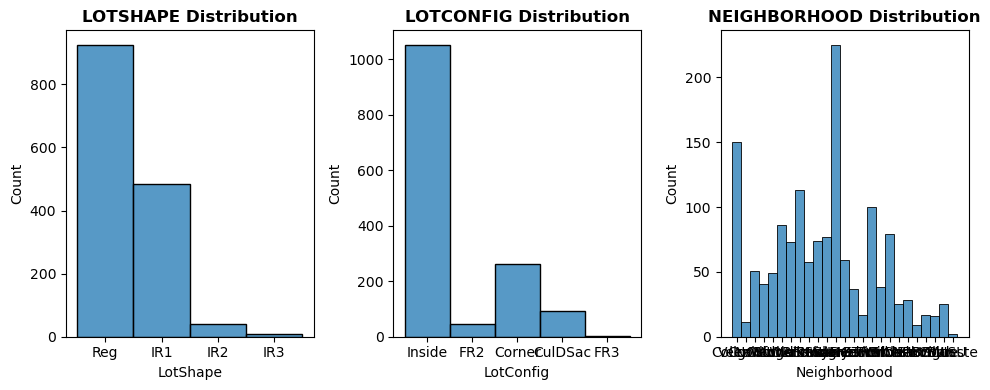

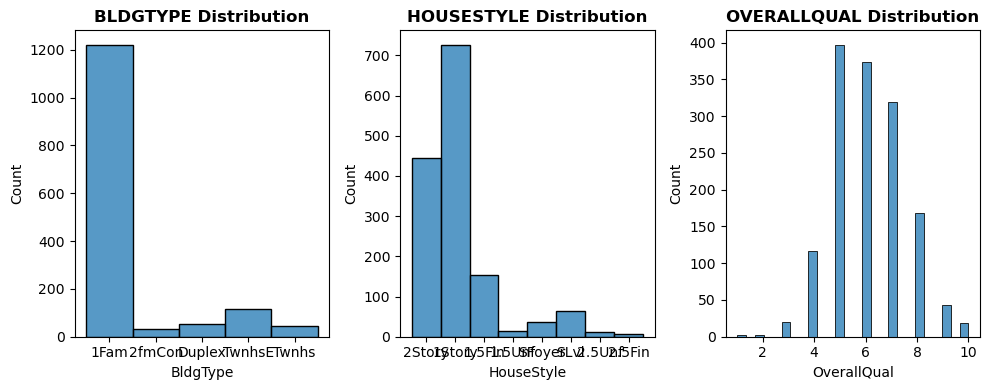

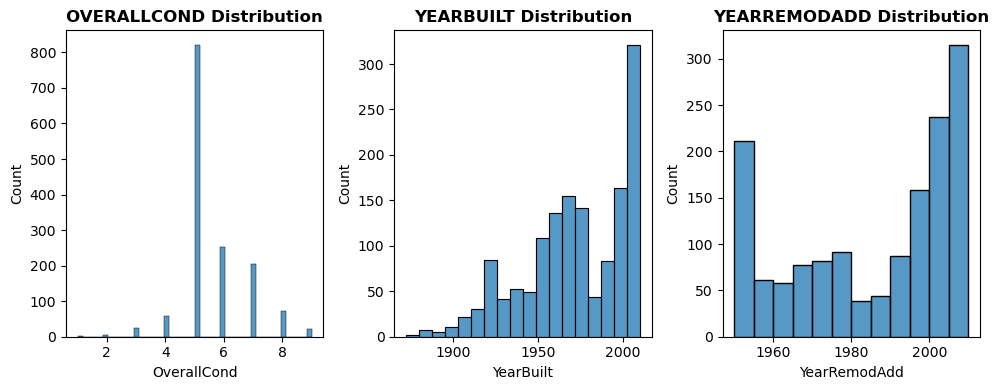

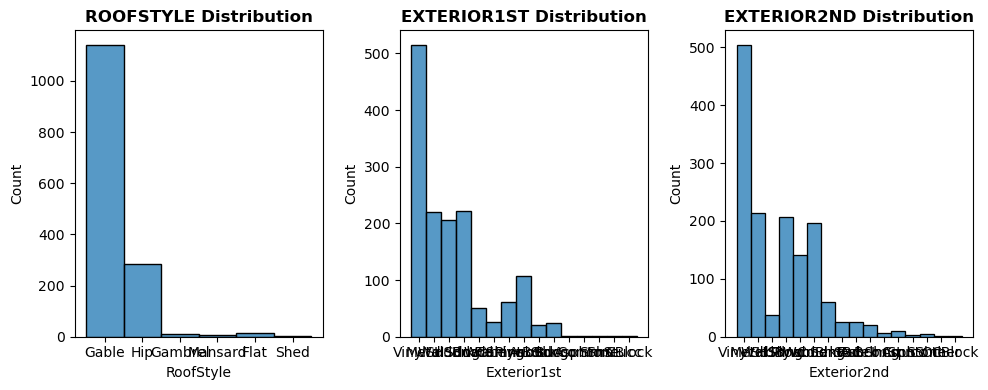

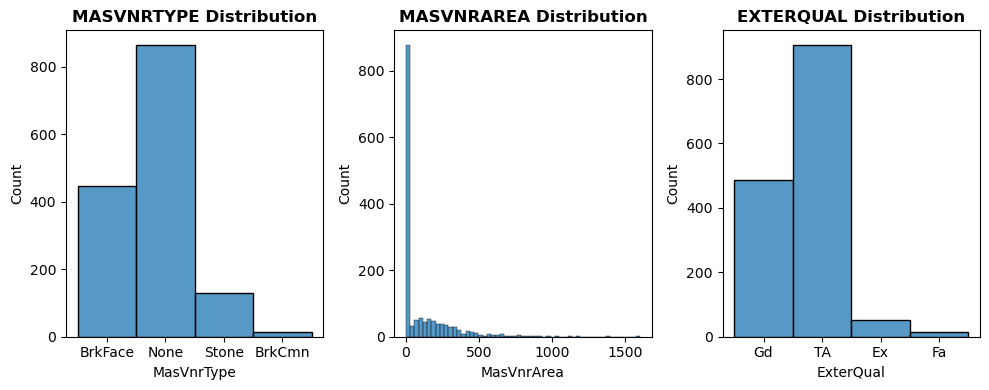

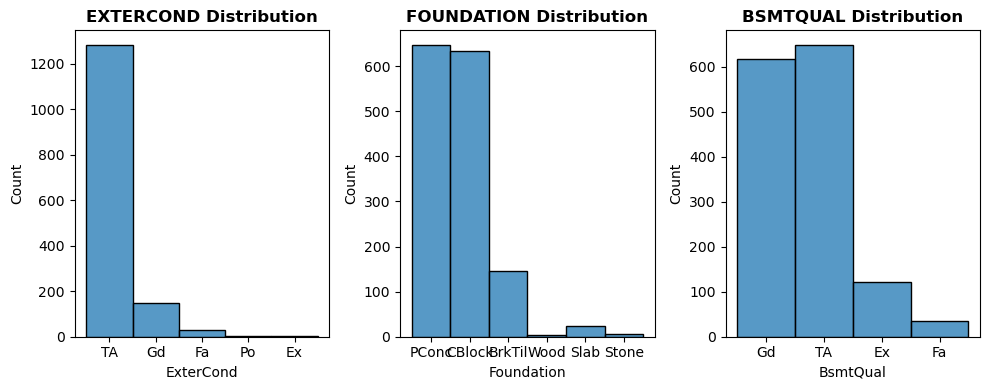

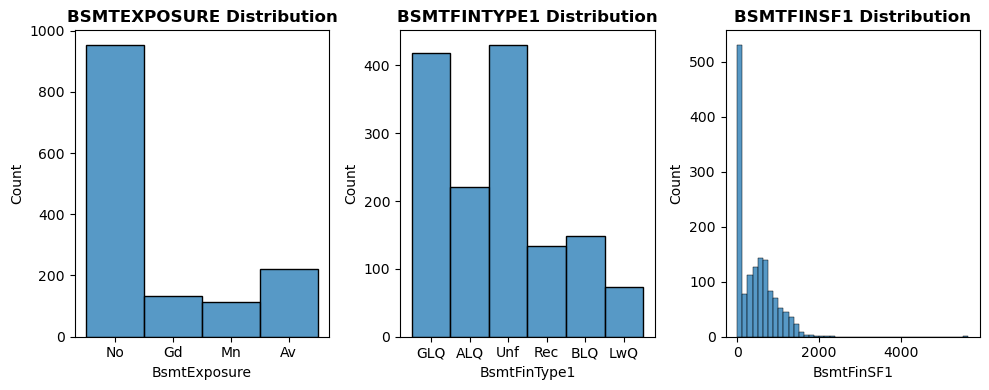

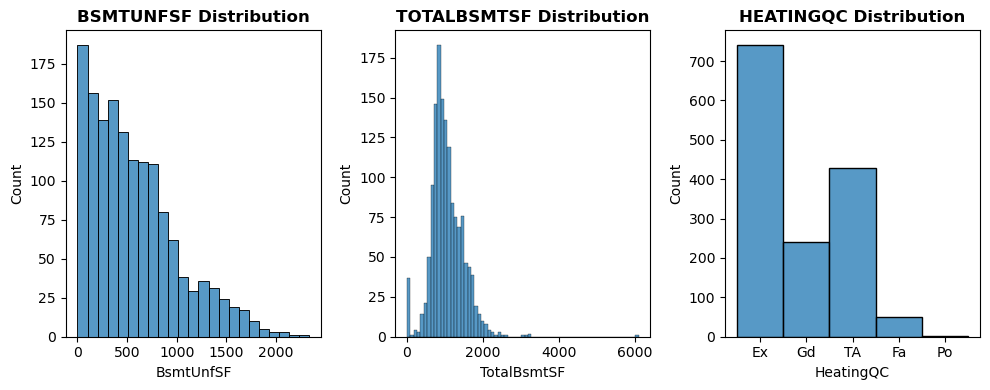

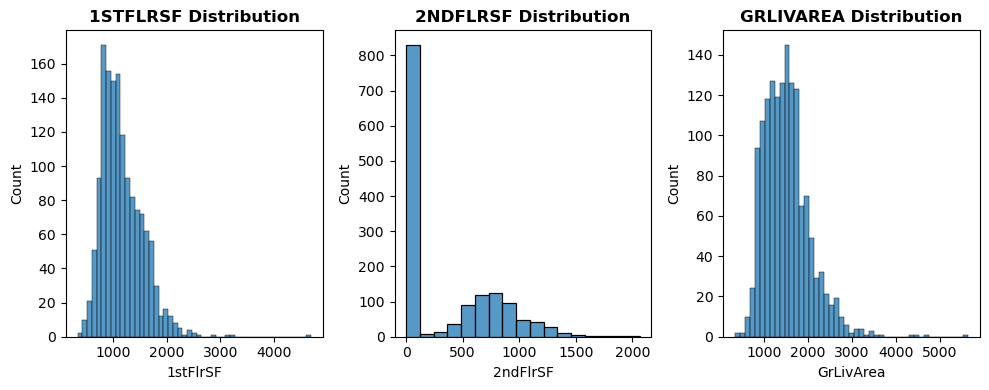

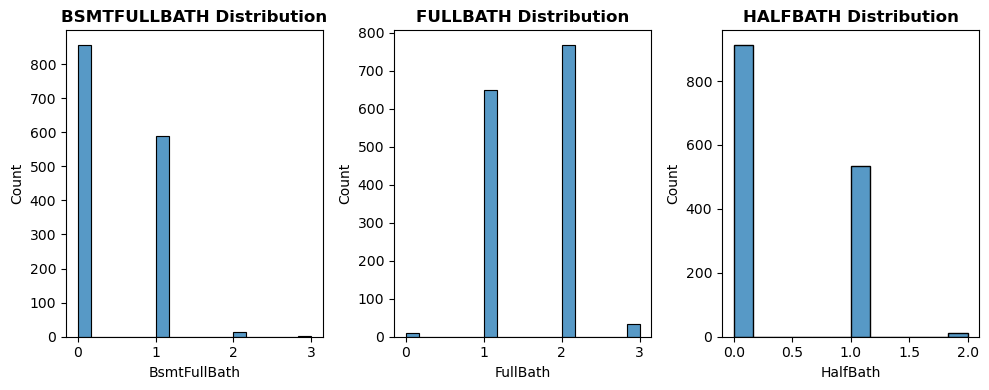

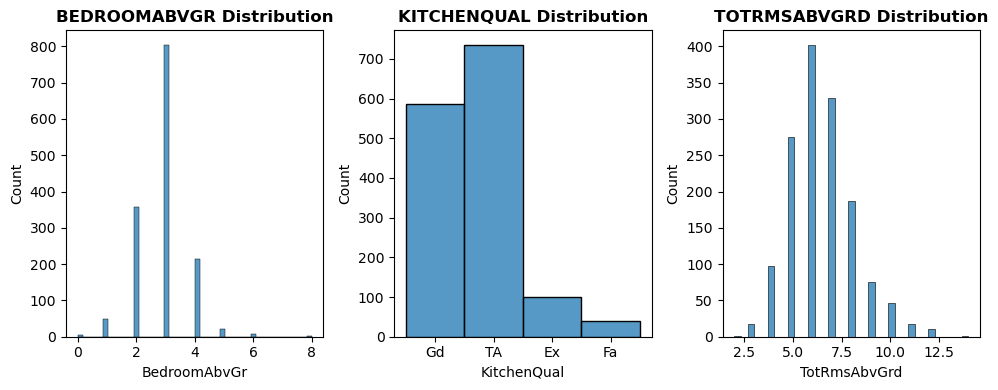

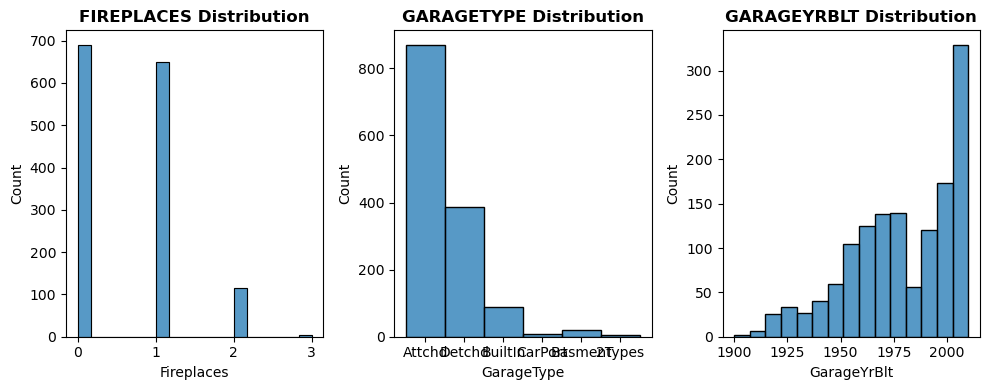

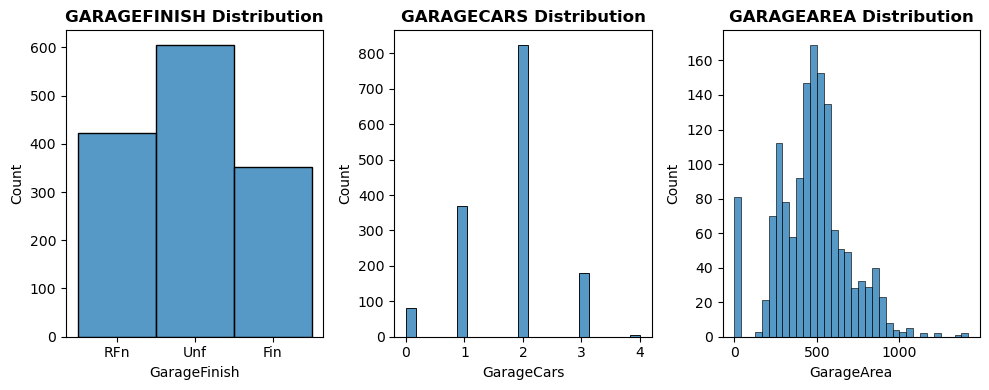

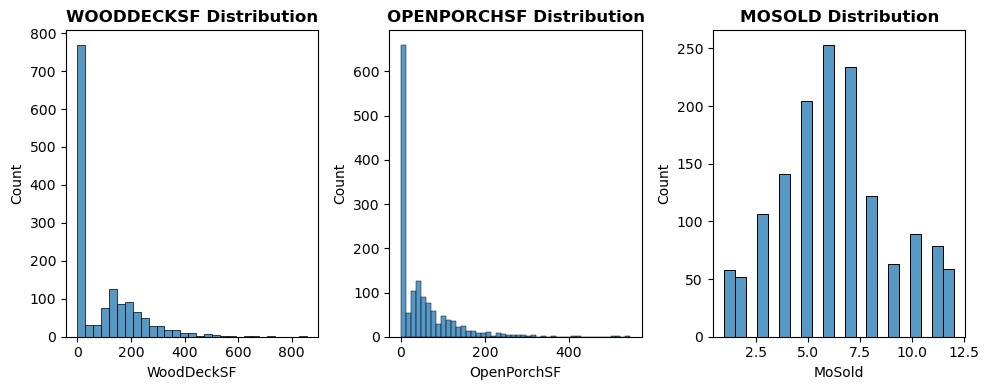

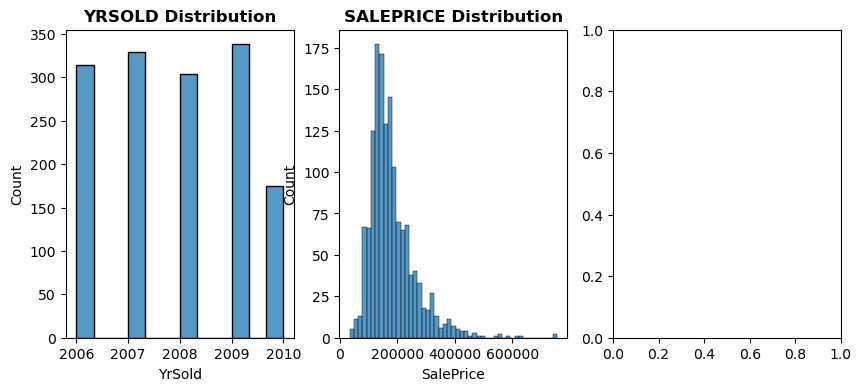

In [872]:
# Check remaining cols Distribution 
col_ax = 0
row_limit = 25
counter = 0
fig, axes = plt.subplots(ncols=3, figsize=(10,4))
# Iterate to all features and display Historgram
for col in df.columns:
    # Set Historgram 
    ax=sns.histplot(data=df, x=col, ax=axes[col_ax])
    axes[col_ax].set_title(col.upper()+" Distribution", fontweight="bold")
    
    # Display every 2 cols and set new fig
    if col_ax == 2 and counter != row_limit:
        fig.tight_layout()
        fig, axes = plt.subplots(ncols=3, figsize=(10,4))
        col_ax = 0
        counter += 1
    else:
        col_ax += 1

- "OverallCond", "MasVnrArea", "MasVnrType", "ExterQual", "ExterCond", "BsmtExposure", "GarageYrBlt" will be dropped due to redundant/Irrelevant data

In [873]:
# Drop cols mentioned above
df.drop(columns=["OverallCond", "MasVnrArea",
                 "MasVnrType", "ExterQual",
                 "ExterCond", "BsmtExposure",
                 "GarageYrBlt"],inplace=True)

In [874]:
# Check Outliers in Lot Area
df['LotArea'].value_counts(ascending=True)

9717      1
7314      1
5389      1
9590      1
11404     1
         ..
9000     14
8400     14
6000     17
9600     24
7200     25
Name: LotArea, Length: 1073, dtype: int64

In [875]:
# Set Threshold of 5% outliers in LotArea to be dropped 
print(f"5% of our Dataset is {round(1460*.05)}")

5% of our Dataset is 73


In [876]:
# Setting threshold of LotArea to 18000 to remove 63 row of outliers and reduce 'Noise'
df_reduced = df[df['LotArea'] <= 18000]

In [877]:
# Check dataset info
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1397 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1397 non-null   int64 
 1   MSZoning      1397 non-null   object
 2   LotArea       1397 non-null   int64 
 3   LotShape      1397 non-null   object
 4   LotConfig     1397 non-null   object
 5   Neighborhood  1397 non-null   object
 6   BldgType      1397 non-null   object
 7   HouseStyle    1397 non-null   object
 8   OverallQual   1397 non-null   int64 
 9   YearBuilt     1397 non-null   int64 
 10  YearRemodAdd  1397 non-null   int64 
 11  RoofStyle     1397 non-null   object
 12  Exterior1st   1397 non-null   object
 13  Exterior2nd   1397 non-null   object
 14  Foundation    1397 non-null   object
 15  BsmtQual      1361 non-null   object
 16  BsmtFinType1  1361 non-null   object
 17  BsmtFinSF1    1397 non-null   int64 
 18  BsmtUnfSF     1397 non-null   int64 
 19  TotalB

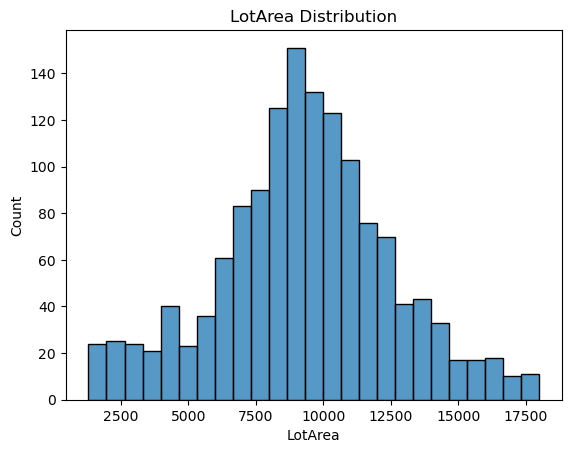

In [878]:
# Double Check LotArea Distribution 
ax= sns.histplot(df_reduced, x='LotArea')
ax.set_title("LotArea Distribution");

## Check For Data Inconcistency

In [879]:
# Select all object colums
cat_cols = df_reduced.select_dtypes(include="object")

# Check for Naming Inconsistency
for col in cat_cols:
    print(f"Checking {col}:\n{df[col].value_counts()}")
    # Separtor for readability 
    print("___________________________")

Checking MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
___________________________
Checking LotShape:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
___________________________
Checking LotConfig:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
___________________________
Checking Neighborhood:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
___________________________
Checking BldgType:
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgTyp

In [880]:
# Double Check Neighborhood
df_reduced['Neighborhood'].value_counts()

NAmes      219
CollgCr    150
OldTown    111
Edwards     96
Somerst     85
NridgHt     76
Gilbert     72
Sawyer      71
NWAmes      70
SawyerW     59
BrkSide     57
Crawfor     47
Mitchel     43
IDOTRR      37
NoRidge     37
Timber      33
SWISU       25
StoneBr     24
MeadowV     17
Blmngtn     17
BrDale      16
ClearCr     14
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

- Everything seems to be consistent 

## Multi Variate Exploratory Analysis

In [881]:
# Import warning to prevent warning messages
import warnings
warnings.filterwarnings("ignore")

In [882]:
# Set Correlation from the entire numerical datapoints
corr = df.corr()
mask = np.triu(np.ones_like(corr))

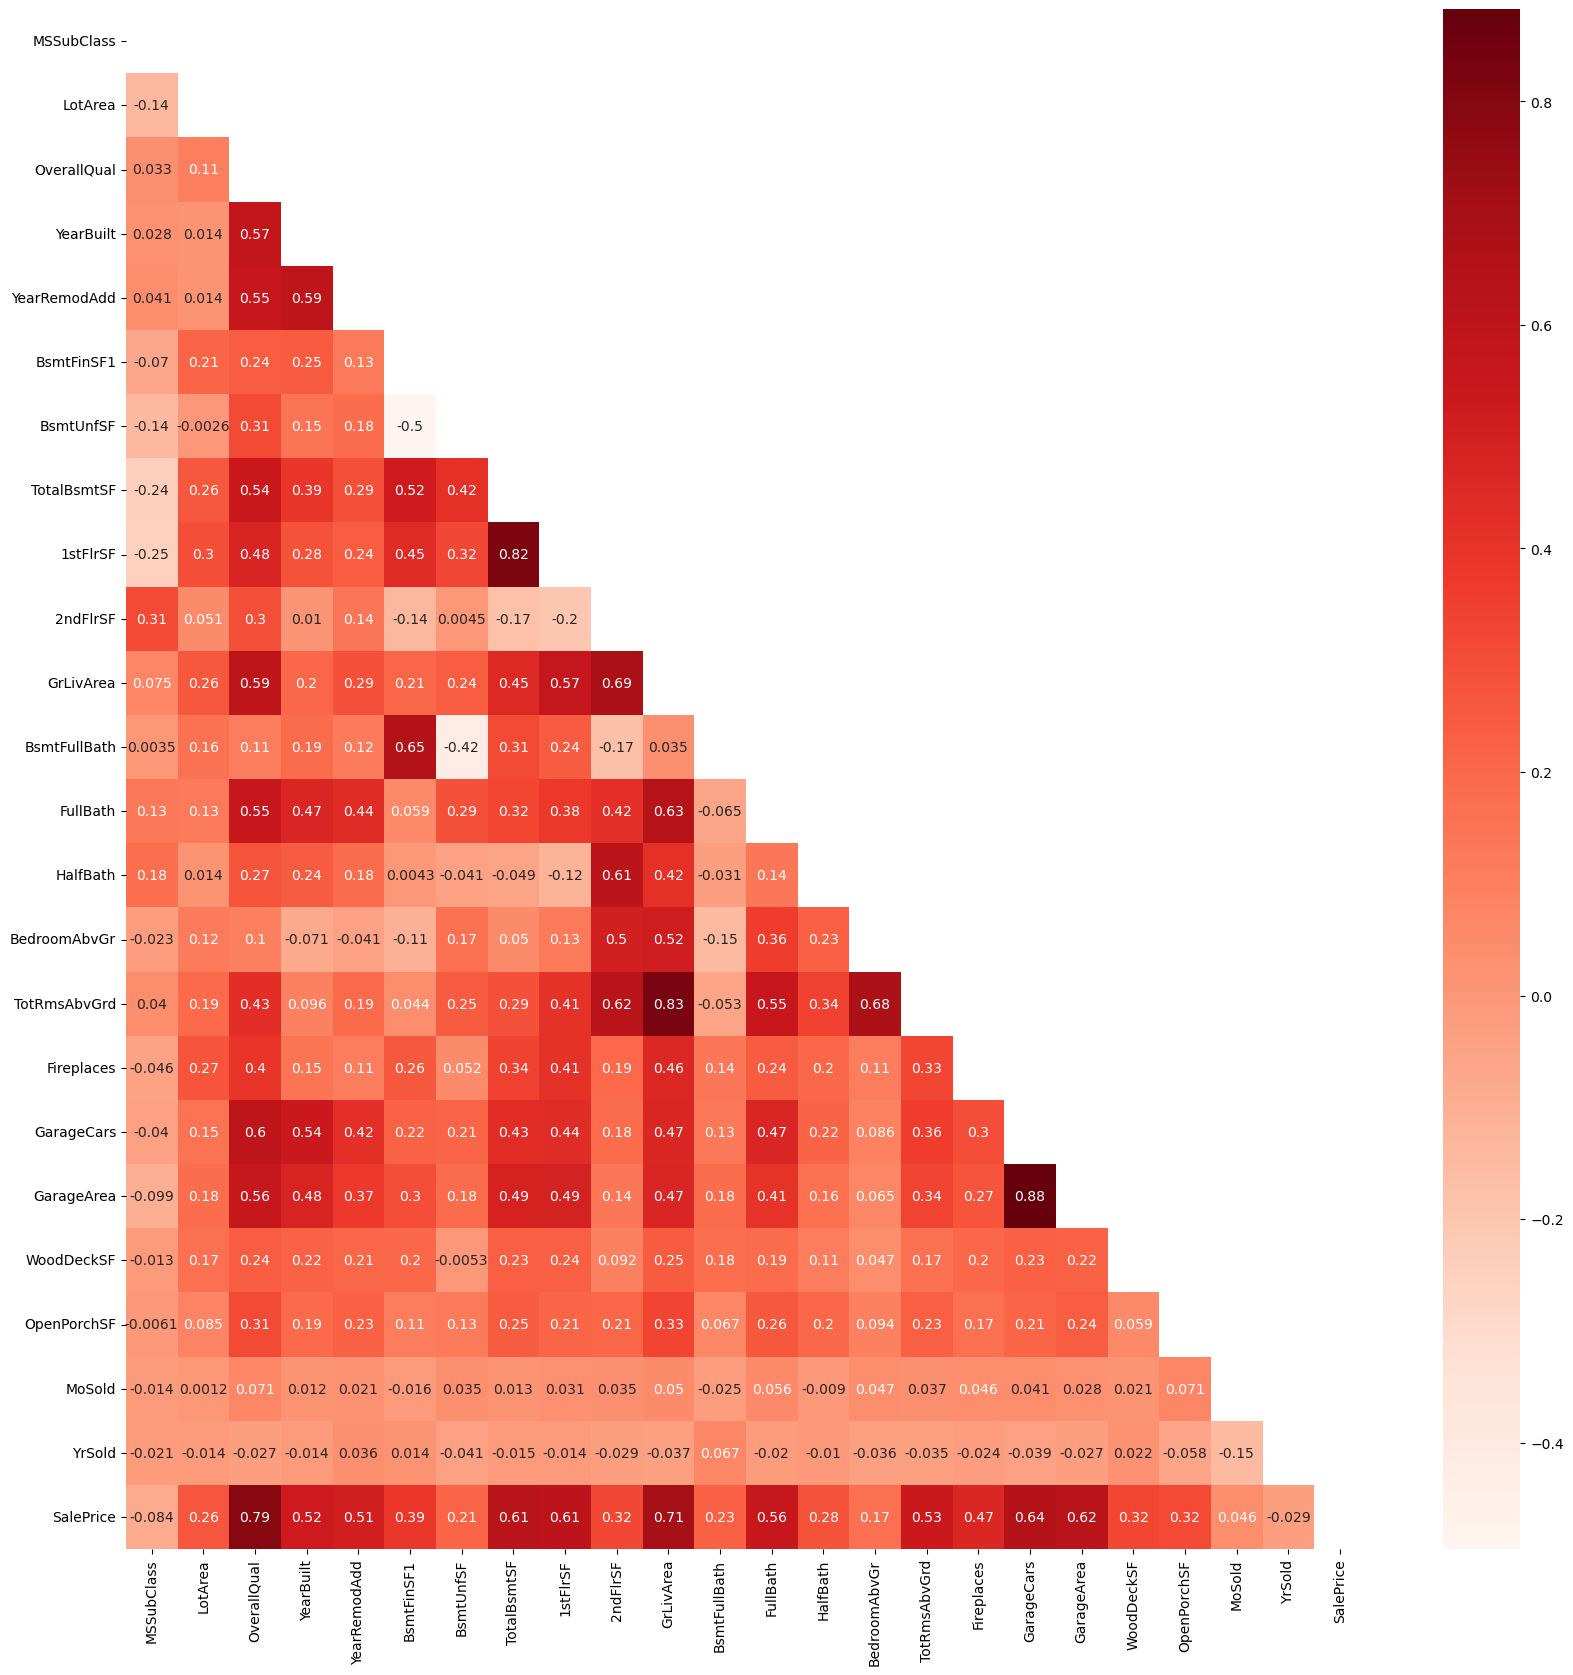

In [883]:
# Set Heatmap
fix, ax = plt.subplots(figsize= (20,20))
ax = sns.heatmap(corr, cmap='Reds', annot = True, mask= mask );

- Here we can see that `OverallQual` and `GrLivArea` has Strong Correlation with our target `SalePrice` 
- YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, GarageCars, Garage Area all have moderate Correlation with our target


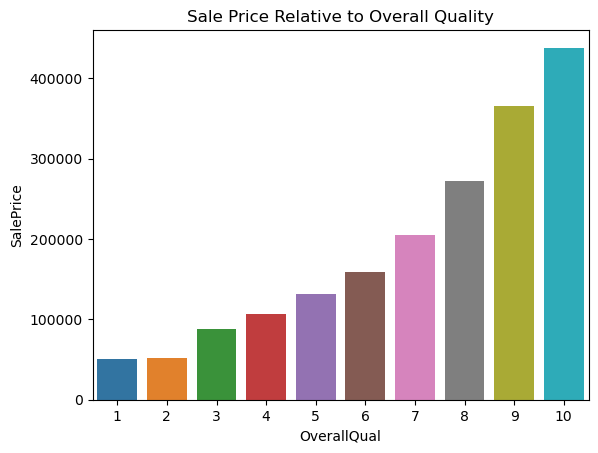

In [884]:
# Set Barplot 
ax= sns.barplot(data=df_reduced, x='OverallQual', y='SalePrice',errorbar=None)
ax.set_title("Sale Price Relative to Overall Quality");

- As Expected the Higher Quality of the house the higher Sale price will be

- Now we can start preprocessing for Machine learning and Handle the remaining Missing Values after splitting the Train / Test sets to avoid Data leakage

## Model Developement 

In [885]:
# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
 
# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


In [886]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'Train_{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'Test_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

### Preprocessing 

In [887]:
# Train Test Split 
X = df_reduced.drop(columns='SalePrice')
y = df_reduced['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [888]:
# check cat_col for OneHotEnconding
print(cat_cols.columns)

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
       'GarageFinish'],
      dtype='object')


- `KitchenQual` and `HeatingQC` will be preprocessed with OrdinalEncoding strategy the rest of categorical columns are Nominal cols and will use OneHotEnconding strategy 
- we only have missing values on Nominal Cols we can use Simple Imputer Strategy most frequent

In [889]:
# Ordinal col
ord_col = ["KitchenQual", "HeatingQC"]
ord = OrdinalEncoder() 

# Nominal cols 
nom_col = list(cat_cols.drop(columns=ord_col).columns)
most_freq_imp = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(handle_unknown='ignore')

# Num cols 
num_cols = make_column_selector(dtype_include='number')
scaler = StandardScaler()


In [890]:
# Make Ordinal tuple 
ord_tuple = (ord, ord_col)

# Make Nominal Pipeline and tuple
nom_pipe = make_pipeline(most_freq_imp, ohe)
nom_tuple = (nom_pipe,nom_col)

# Make Num tuple
num_tuple = (scaler, num_cols)

# Make Preprocessor 
preprocessor = make_column_transformer(ord_tuple,nom_tuple,num_tuple)
preprocessor

ColumnTransformer(transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['KitchenQual', 'HeatingQC']),
                                ('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MSZoning', 'LotShape', 'LotConfig',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'Exterior1st', 'Exterior2nd',
                                  'Foundation', 'BsmtQual', 'BsmtFinType1',
                                  'GarageType', 'GarageFinish']),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000015802B898E0>)])

In [891]:

# Fit and Transform X_train X_test
preprocessor.fit(X_train)

X_train_proc = preprocessor.transform(X_train).toarray()
X_test_proc = preprocessor.transform(X_test).toarray()



In [892]:
# Check shape
X_train_proc.shape

(1047, 138)

In [893]:
print(type(X_train_proc))

<class 'numpy.ndarray'>


### `Model #1` - Single Hidden Layer 

In [894]:
# create model architecture
input_dim = X_train_proc.shape[1]
 
reg_model = Sequential()
 
reg_model.add(Dense(138, input_dim=input_dim, activation='relu'))
reg_model.add(Dense(20, activation='relu'))
reg_model.add(Dense(1, activation='linear'))
 
reg_model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_198 (Dense)           (None, 138)               19182     
                                                                 
 dense_199 (Dense)           (None, 20)                2780      
                                                                 
 dense_200 (Dense)           (None, 1)                 21        
                                                                 
Total params: 21,983
Trainable params: 21,983
Non-trainable params: 0
_________________________________________________________________


In [895]:
# compile model with additional metrics
 
reg_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [896]:
# Fit model and save results to History
history = reg_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose = 0)

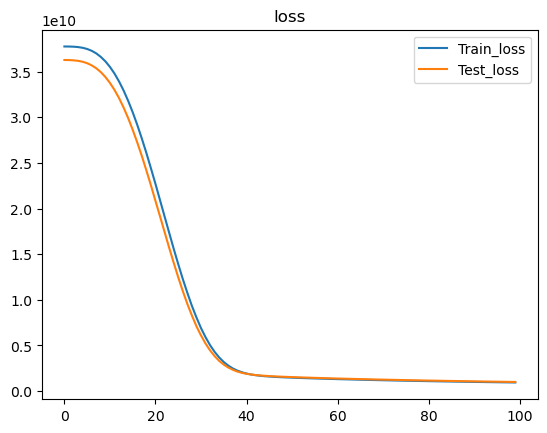

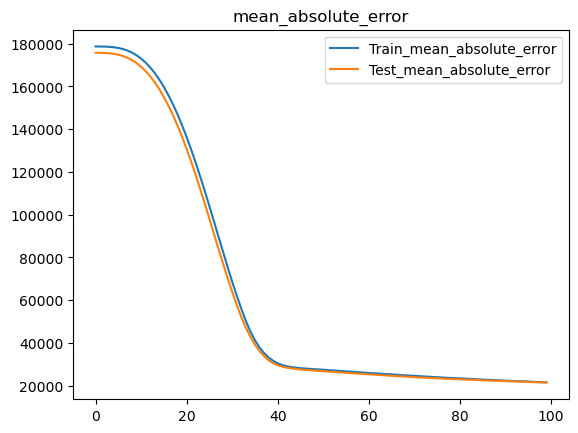

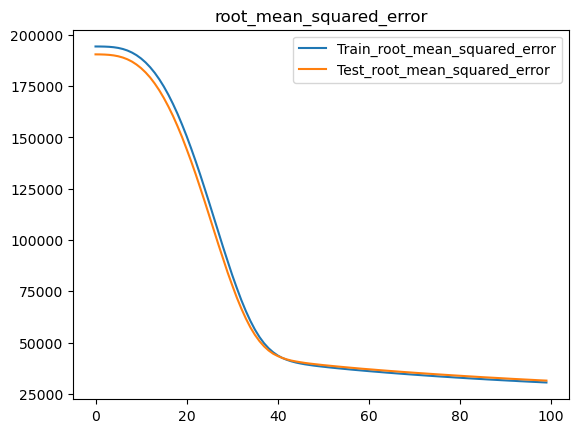

In [897]:
# plot learning
 
plot_history(history)

- Here we can see our first model did not suffer with any over-fitting or underfitting, we see some solid hockey-stick-shaped learning curve and the 100th epoch lost for both training and testing are very similar

In [898]:
# Show Regression Metric scores
y_pred = reg_model.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

11/11 [==============================] - 0s 802us/step
final RMSE: 31428.65516789241
final MAE: 21496.418616071427
final R2: 0.8171243156834589


- Our first model R2 score shows 82% of our target's variance with Mean-Absolute-Error of about $20500 off from the actual price and seems to being punished for making larger errors by Root-Mean-Squared-Error hense why see almost 45% increase in prediction error relative to MAE

### `Model #2` - Multiple Hidden Layers with Dropouts and Nadam Optimizer

In [899]:
# create model architecture
reg_model_2 = Sequential()

reg_model_2.add(Dense(138, input_dim=input_dim, activation='relu'))
reg_model_2.add(Dropout(.2))
# 1st hidden layer
reg_model_2.add(Dense(50, activation='relu'))
reg_model_2.add(Dropout(.2))
# 2nd hidden layer 
reg_model_2.add(Dense(10, activation='relu'))
reg_model_2.add(Dropout(.2))

reg_model_2.add(Dense(1, activation='linear'))
 
reg_model_2.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_201 (Dense)           (None, 138)               19182     
                                                                 
 dropout_27 (Dropout)        (None, 138)               0         
                                                                 
 dense_202 (Dense)           (None, 50)                6950      
                                                                 
 dropout_28 (Dropout)        (None, 50)                0         
                                                                 
 dense_203 (Dense)           (None, 10)                510       
                                                                 
 dropout_29 (Dropout)        (None, 10)                0         
                                                                 
 dense_204 (Dense)           (None, 1)               

In [900]:
# compile model with additional metrics
 
reg_model_2.compile(loss='mse',
                  optimizer='Nadam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [901]:
# Fit model and save results to History
history_2 = reg_model_2.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose = 0)

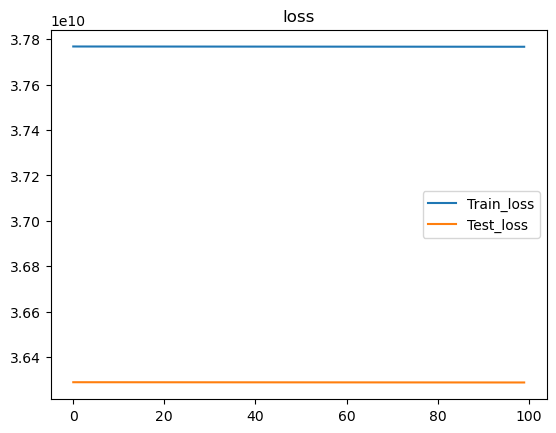

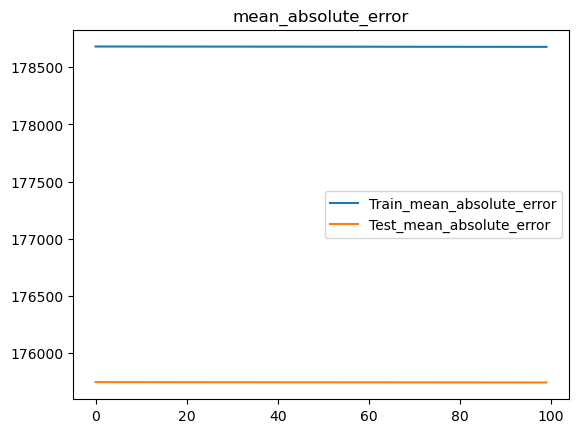

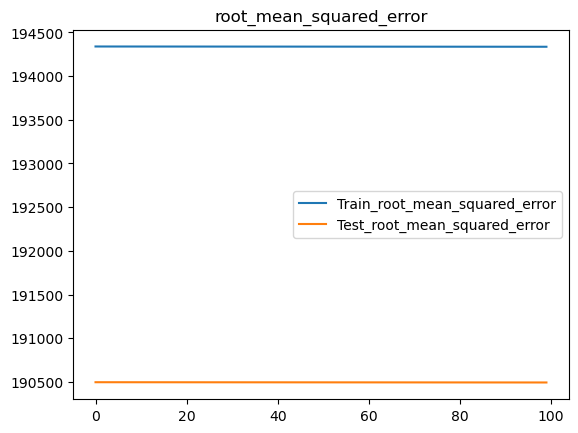

In [902]:
# plot learning
 
plot_history(history_2)

- Here we can see that our Second Model suffered with Underfitting after adding dropout layers within our model 

In [903]:
# Show Regression Metric scores
y_pred_2 = reg_model_2.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_2))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred_2)}')
print(f'final R2: {r2_score(y_test, y_pred_2)}')

11/11 [==============================] - 0s 952us/step
final RMSE: 190493.0768269119
final MAE: 175745.1151531519
final R2: -5.718352108203901


- Here we can see that our second model suffered a little bit on training but Imporved its prictions in our test set boasting 85% variance in our target and Mean Absolute Error of around $19000 off from the actual target price which is little better than our first model but still suffering with larger errors may also be due to our dropouts 

### `Final Model` - Multiple Hidden layers without Dropout and with Adam Optimizer, 500 epoch with early stopper 

In [904]:
# create model architecture

reg_model_f = Sequential()

# Input layer
reg_model_f.add(Dense(138, input_dim=input_dim, activation='relu'))
# First Hidden Layer
reg_model_f.add(Dense(30, activation='relu'))
# Second Hidden Layer 
reg_model_f.add(Dense(10, activation='relu'))
# Thirst Hidden Layer
reg_model_f.add(Dense(3, activation='relu'))

# Output Layer
reg_model_f.add(Dense(1, activation='linear'))
 
reg_model_f.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_205 (Dense)           (None, 138)               19182     
                                                                 
 dense_206 (Dense)           (None, 30)                4170      
                                                                 
 dense_207 (Dense)           (None, 10)                310       
                                                                 
 dense_208 (Dense)           (None, 3)                 33        
                                                                 
 dense_209 (Dense)           (None, 1)                 4         
                                                                 
Total params: 23,699
Trainable params: 23,699
Non-trainable params: 0
_________________________________________________________________


In [905]:
# compile model with additional metrics
 
reg_model_f.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [906]:
# Add Early Stopping
early_stopping = EarlyStopping(patience = 5)

In [907]:
# Fit model and save results to History
history_f = reg_model_f.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=500,
                        callbacks= [early_stopping],
                        verbose = 0)

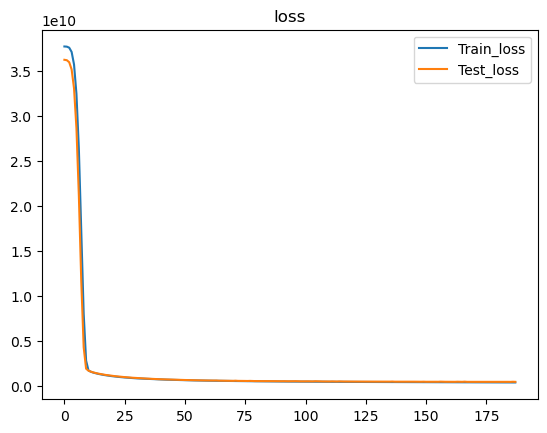

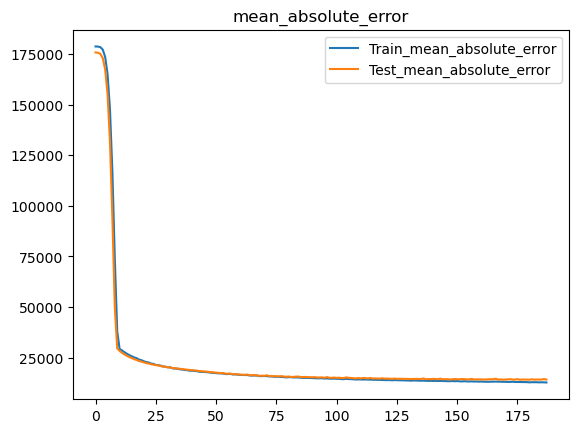

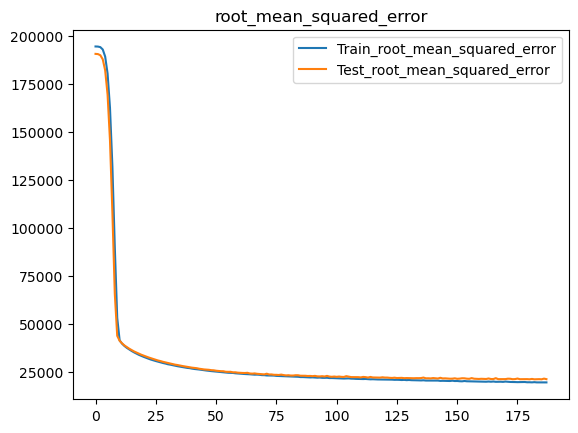

In [908]:
# plot learning
 
plot_history(history_f)

- Our Final Model 'elbow' occurred around the 20th epoch compared to our first model's 'elbow' right around the 35th epoch meaning our final model seems to be recognizing the pattern faster than our first model

In [909]:
# Show Regression Metric scores
y_pred_f = reg_model_f.predict(X_test_proc)
 
print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_f))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred_f)}')
print(f'final R2: {r2_score(y_test, y_pred_f)}')

11/11 [==============================] - 0s 902us/step
final RMSE: 21063.716313088302
final MAE: 14250.41119419643
final R2: 0.917856280794192


- Here we can see that our final model performed the best compared to our prior models, boasting 91% R2 Score and MAE of sub-$15000 off the actual value in average, adding more hidden layers added more complexity in our model and yielded better results. 